<a href="https://colab.research.google.com/github/Tdesius/ttnt/blob/main/523H0136_lec03_EightPuzzels_GraphViz_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise: Visualizing the state space of 8-puzzle game

## Introduction to graphviz

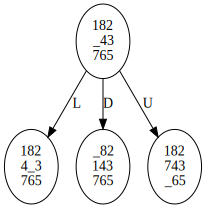

In [ ]:
from graphviz import Digraph

dot = Digraph()
dot.node('0', '182\n_43\n765')
dot.node('1', '182\n4_3\n765')
dot.node('2', '_82\n143\n765')
dot.node('3', '182\n743\n_65')
dot.edge('0', '1', 'L')
dot.edge('0', '2', 'D')
dot.edge('0', '3', 'U')

dot

## Defining Node class

Complete TODOs 1 - 3

In [ ]:
from copy import deepcopy
from graphviz import Digraph

class Node:

  def __init__(self, state, action = None, parent = None):
    self.state = state # 2D list (3x3)
    self.id = str(self) # identifier of node
    self.action = action
    self.parent = parent

  def __str__(self):
    '''
    # TODO 1
    Return a string representing the state of the node.
    Note to remember the 0 digit by '_'
    e.g., '182\n_43\n765'
    '''
    return "\n".join("".join(str(cell) if cell != 0 else '_' for cell in row) for row in self.state)

  def get_successors(self):
    '''
    # TODO 2
    Return the list of successors of the state (self).
    '''
    successors = []
    actions = ['L', 'R', 'U', 'D']

    for action in actions:
      new_state = deepcopy(self.state)
      updated_state = self.get_successor(action,new_state)

      if updated_state:
        successors.append(Node(updated_state,action,self))
    return successors

  def get_successor(self, action, state):
    pi, pj = self.get_blank_pos(state)
    pi, pj = self.get_dest_pos(action, pi, pj)
    if 0 <= pi and pi < 3 and 0 <= pj and pj < 3:
      if action == 'L':
        state[pi][pj - 1] = state[pi][pj]
      if action == 'R':
        state[pi][pj + 1] = state[pi][pj]
      if action == 'U':
        state[pi-1][pj] = state[pi][pj]
      if action == 'D':
        state[pi+1][pj] = state[pi][pj]
      state[pi][pj] = 0
      return state
    return None

  def get_dest_pos(self, action, pi, pj):
    if action == 'L':
      pj += 1
    if action == 'R':
      pj -= 1
    if action == 'U':
      pi += 1
    if action == 'D':
      pi -= 1
    return pi, pj

  def get_blank_pos(self, state):
    '''
    # TODO 3
    Return the location (i, j) of the 0 digit (blank cell).
    '''
    for i in range(3):
      for j in range(3):
        if state[i][j] == 0:
          return i,j
    return None
    #return next((i,j) for i in range(3) for j in range(3) if state[i][j] == 0)

  def get_id(self):
    return self.id

  def get_node_str(self):
    return str(self)

  def get_action(self):
    return self.action

  def draw(self, dot):
    dot.node(self.get_id(), self.get_node_str())
    if self.parent is not None:
      dot.edge(self.parent.get_id(), self.get_id(), self.get_action())

init_state = [
    [1, 8, 2],
    [0, 4, 3],
    [7, 6, 5]
]

node = Node(init_state)

print(f"initial state:\n{node}")
print(f"\nSuccessors:")
for succ in node.get_successors():
  print(succ, "\nAction:", succ.get_action(), "\n")


initial state:
182
_43
765

Successors:
182
4_3
765 
Action: L 

182
743
_65 
Action: U 

_82
143
765 
Action: D 



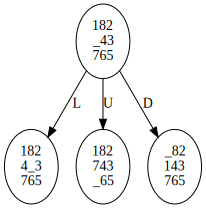

In [ ]:
def expand(dot, n):
  successors = n.get_successors()
  for s in successors:
    s.draw(dot)

n = Node([[1, 8, 2],
          [0, 4, 3],
          [7, 6, 5]])
dot = Digraph()
n.draw(dot)
expand(dot, n)

dot

## Implement graph-search

Complete TODO 4

Goal reached in 369 expansions!


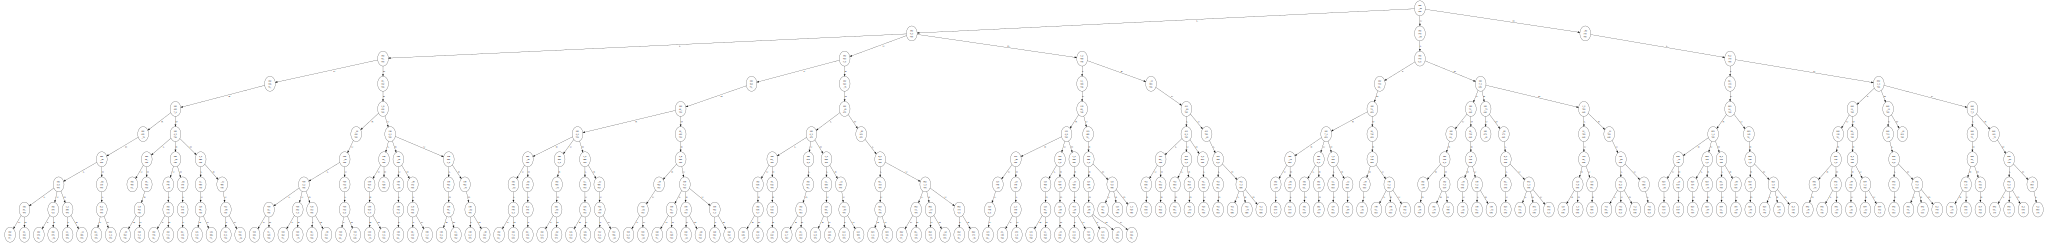

In [ ]:
def graph_search(node, max_num_nodes = 20):
  dot = Digraph()
  frontier = list()
  explored = set()
  frontier.append(node)
  count = 0

  goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

  while len(frontier) > 0 and count < max_num_nodes:
    '''
    # TODO 4
    Complete the body of the loop statement regarding the graph-search algorithm.
    The output is an example of the tree expanded the the process.
    '''
    current_node = frontier.pop(0) #remove node from frontier
    if current_node.get_id() in explored:
        continue #skip if explored

    explored.add(current_node.get_id()) #add to explored
    current_node.draw(dot) #draw current node

    #Check if goal state is reached
    if current_node.state == goal_state:
      print(f"Goal reached in {count} expansions!")
      return dot  # Stop searching

    for successor in current_node.get_successors():
        if successor.get_id() not in explored:
            frontier.append(successor) #add node to frontier

    count += 1 #Increase expand count
  print(f"Search stopped after {count} expansions. Goal not found.")
  return dot

n = Node([[1, 8, 2],
          [0, 4, 3],
          [7, 6, 5]])
dot = graph_search(n, 1000)
dot

# Submission

*   Students download the notebook after completion
*   Rename the notebook in which inserting your student ID at the beginning. \
For example, **123456-lec03-8-Puzzel-GraphViz-HW.inynb**
*   Finally, submit the file

